In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
pd.set_option('display.max_rows', None)

In [32]:
df = pd.read_csv('https://media.githubusercontent.com/media/mayurasandakalum/datasets/main/shop-customer-data/Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [33]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


remove null values

In [35]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [36]:
df = df.dropna(subset=['Profession'])
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [37]:
df.shape

(1965, 8)

In [38]:
df[df['Age'] < 18].count()

CustomerID                327
Gender                    327
Age                       327
Annual Income ($)         327
Spending Score (1-100)    327
Profession                327
Work Experience           327
Family Size               327
dtype: int64

In [39]:
df1 = df[~(df['Age'] < 18)]
df1.shape

(1638, 8)

get column names

In [40]:
all_columns = df1.columns.to_list()
categorical_columns = df1.select_dtypes(include=['object']).columns.to_list()
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns.to_list()

print(all_columns)
print(categorical_columns)
print(numerical_columns)

['CustomerID', 'Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Profession', 'Work Experience', 'Family Size']
['Gender', 'Profession']
['CustomerID', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']


In [41]:
for column in numerical_columns:
    if column == "Work Experience":
        continue
    
    index = df1[column].value_counts().sort_index().index[0]
    
    if index == 0:
        print(column)
        print(f"{df1[column].value_counts().sort_index().index[0]} - {df1[column].value_counts().sort_index().values[0]}")

Annual Income ($)
0 - 2
Spending Score (1-100)
0 - 1


In [42]:
for column in numerical_columns:
    if column == "Work Experience":
        continue

    index = df1[column].value_counts().sort_index().index[0]

    if index == 0:
        df1 = df1[df1[column] != 0]

In [43]:
df1.shape

(1635, 8)

In [44]:
for column in ["Gender", "Profession"]:
    print(df1[column].value_counts())
    print("\n")

Gender
Female    973
Male      662
Name: count, dtype: int64


Profession
Artist           513
Healthcare       281
Entertainment    197
Engineer         156
Executive        126
Doctor           126
Lawyer           118
Marketing         68
Homemaker         50
Name: count, dtype: int64




outliers

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1635 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1635 non-null   int64 
 1   Gender                  1635 non-null   object
 2   Age                     1635 non-null   int64 
 3   Annual Income ($)       1635 non-null   int64 
 4   Spending Score (1-100)  1635 non-null   int64 
 5   Profession              1635 non-null   object
 6   Work Experience         1635 non-null   int64 
 7   Family Size             1635 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 115.0+ KB


In [46]:
df2 = df1.drop('CustomerID', axis=1)

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1635 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  1635 non-null   object
 1   Age                     1635 non-null   int64 
 2   Annual Income ($)       1635 non-null   int64 
 3   Spending Score (1-100)  1635 non-null   int64 
 4   Profession              1635 non-null   object
 5   Work Experience         1635 non-null   int64 
 6   Family Size             1635 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 102.2+ KB


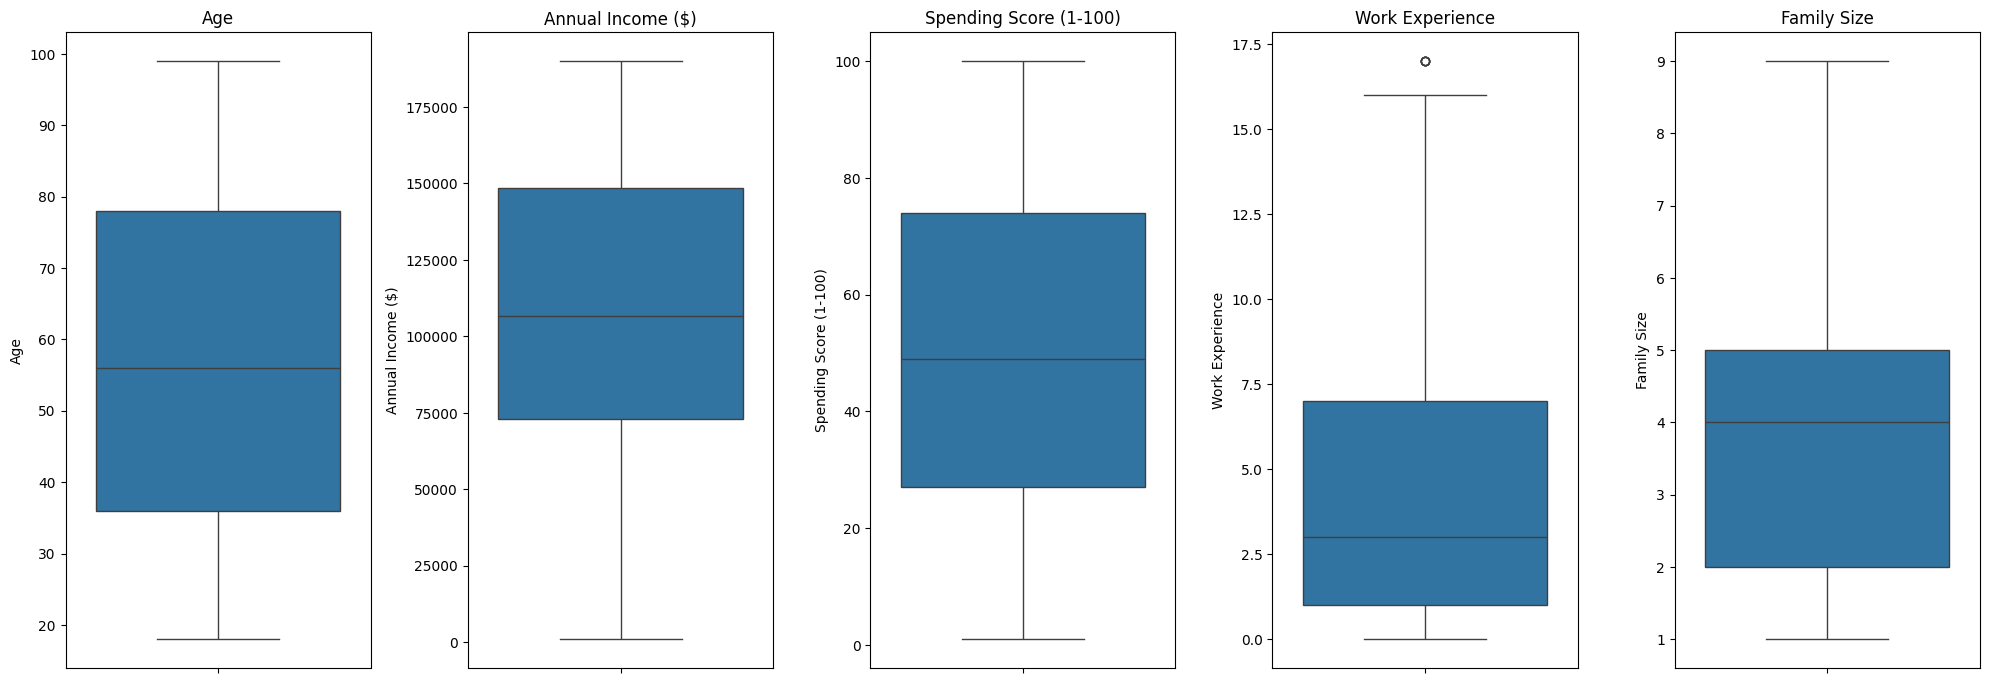

In [48]:

plt.figure(figsize=(20, 20))

# Track the current plot index
plot_index = 1

# Iterate through columns and create boxplots for each numerical column
for column in df2.columns:
    if column in categorical_columns:
        continue
    
    plt.subplot(3, 5, plot_index)
    sns.boxplot(data=df2[column])
    plt.title(column)
    plot_index += 1

plt.tight_layout()
plt.show()


In [49]:
numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns.to_list()
numerical_columns

['Age',
 'Annual Income ($)',
 'Spending Score (1-100)',
 'Work Experience',
 'Family Size']

In [50]:
# remove outliers
for column in numerical_columns:
    if column:
        q1 = df2[column].quantile(0.25)
        q3 = df2[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df2 = df2[(df2[column] > lower_bound) & (df2[column] < upper_bound)]

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1625 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  1625 non-null   object
 1   Age                     1625 non-null   int64 
 2   Annual Income ($)       1625 non-null   int64 
 3   Spending Score (1-100)  1625 non-null   int64 
 4   Profession              1625 non-null   object
 5   Work Experience         1625 non-null   int64 
 6   Family Size             1625 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 101.6+ KB


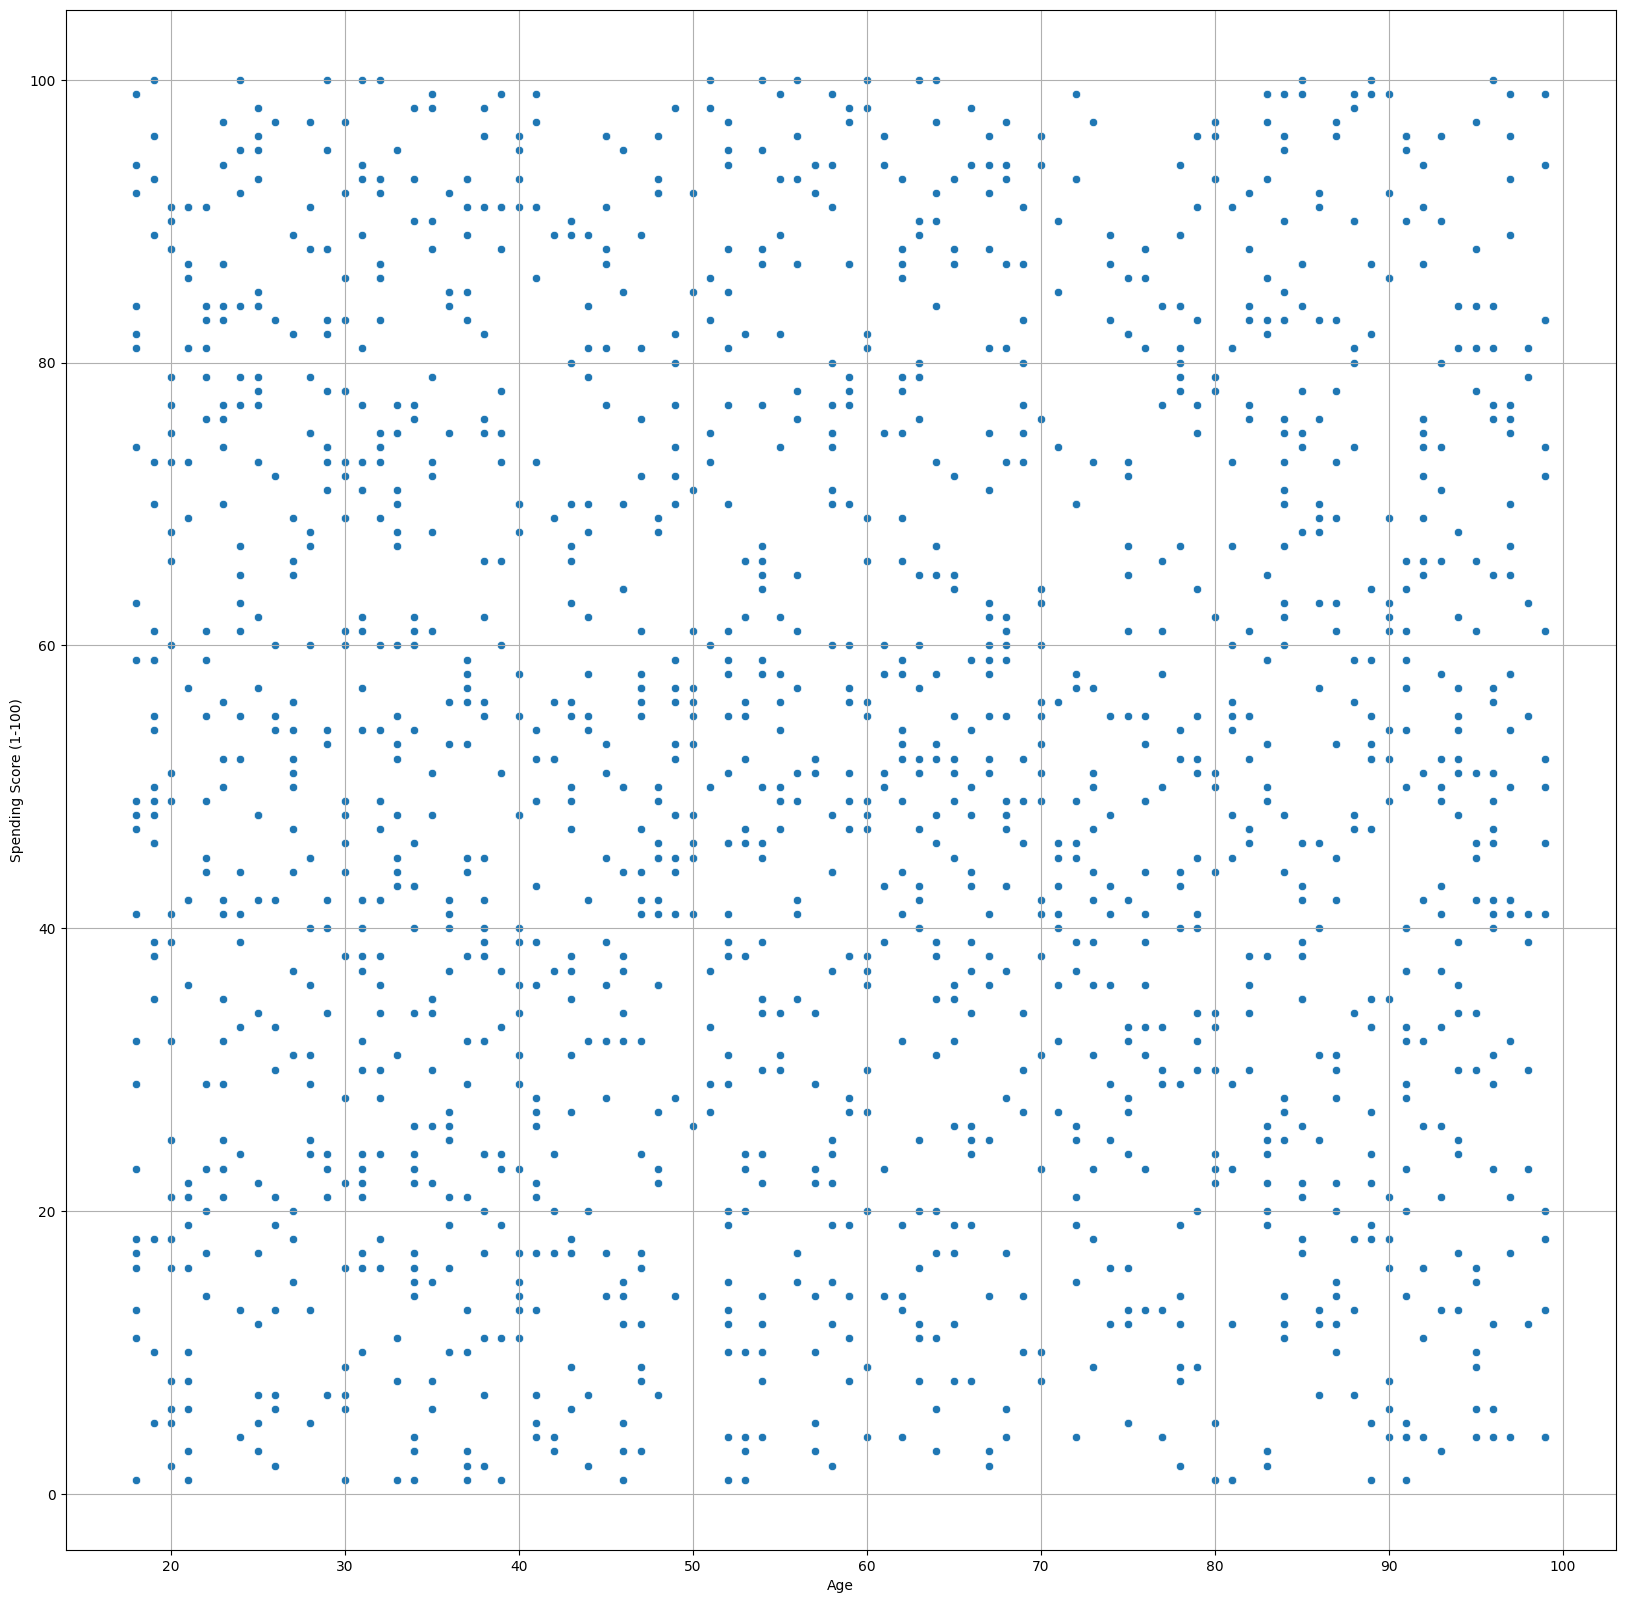

In [54]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df2, x='Age', y='Spending Score (1-100)')
plt.grid()
plt.show()

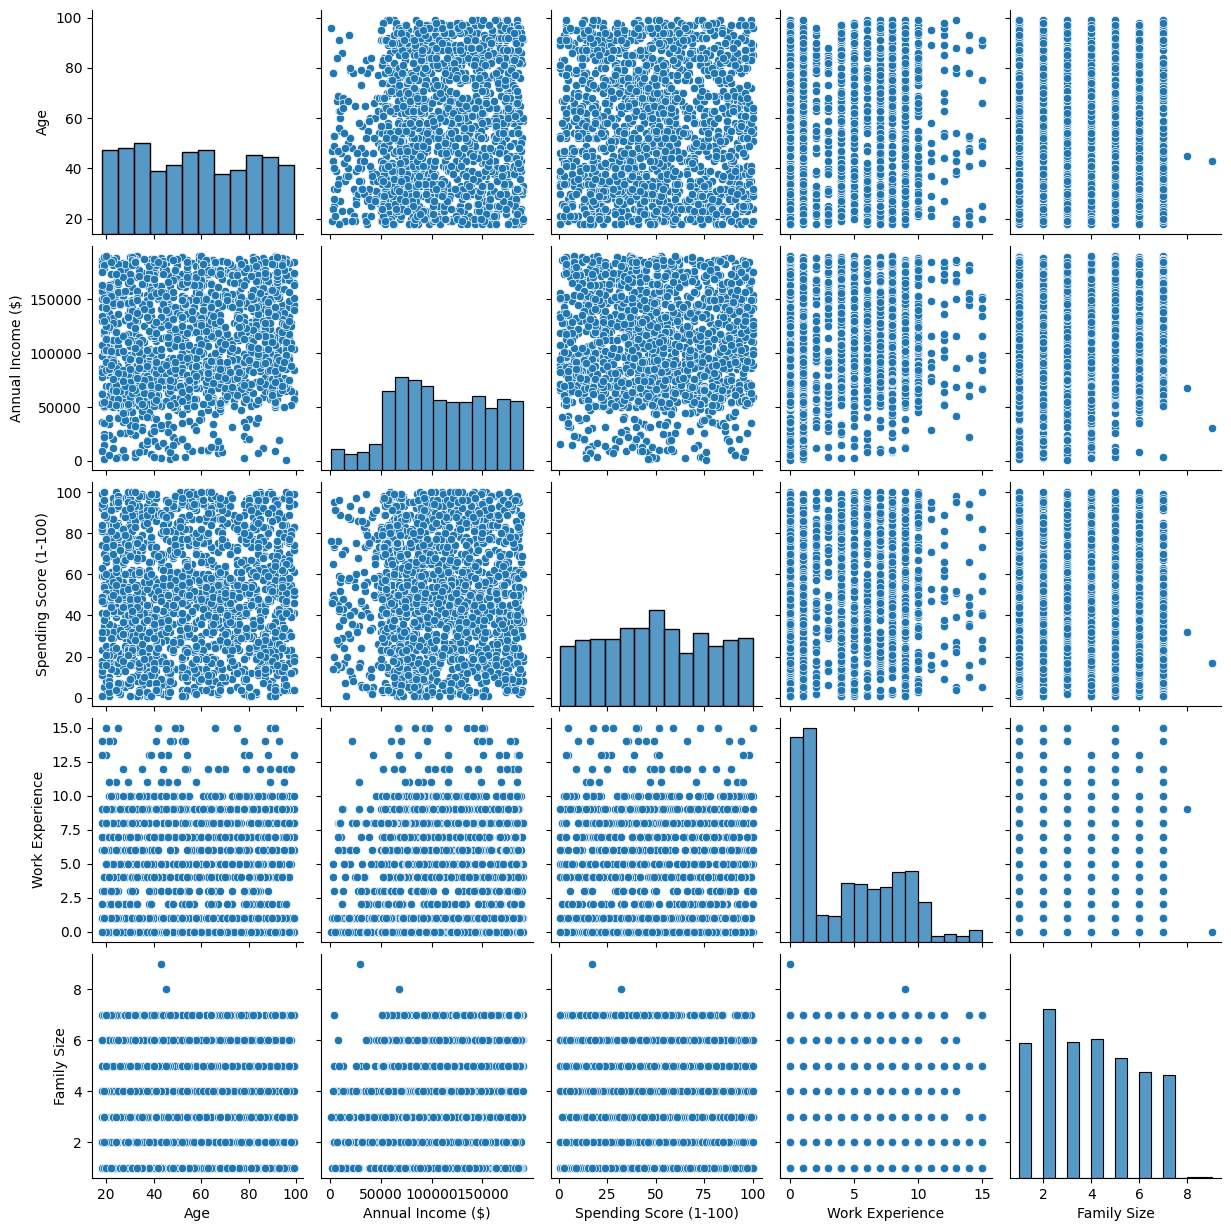

In [53]:
sns.pairplot(df2)